In [ ]:
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt

LOADING THE DATASET

In [ ]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Visualising the dataset

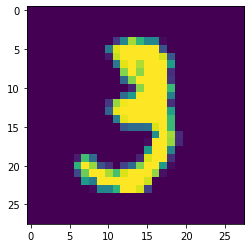

In [ ]:
train_images.resize(len(train_images),28,28)
from matplotlib import pyplot as plt
plt.imshow(train_images[10], interpolation='nearest')
plt.show()

NORMALISATION OF DATA

In [ ]:
train_images = train_images.reshape((60000,28,28,1))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000,28,28,1))
test_images = test_images.astype('float32')/255

MODEL

In [ ]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape = (28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(10, activation= 'softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 576)              

COMPILING THE MODEL

In [ ]:
model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

FITTING THE MODEL

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size = 64)

Epoch 1/5
938/938 [==============================] - 49s 52ms/step - loss: 0.1802 - accuracy: 0.9444
Epoch 2/5
938/938 [==============================] - 47s 51ms/step - loss: 0.0474 - accuracy: 0.9851
Epoch 3/5
938/938 [==============================] - 47s 51ms/step - loss: 0.0325 - accuracy: 0.9900
Epoch 4/5
938/938 [==============================] - 49s 52ms/step - loss: 0.0247 - accuracy: 0.9923
Epoch 5/5
938/938 [==============================] - 47s 50ms/step - loss: 0.0180 - accuracy: 0.9947


Prediction and Accuracy on Test Data

In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 9ms/step - loss: 0.0314 - accuracy: 0.9919


[0.03144185617566109, 0.9919000267982483]